# Application of ordinary differential equations to model gene regulatory network 

Mathematical modelling is frequently used in systems biology to develop and simulate models of gene regulatory networks and signalling pathways. Such models are often built on systems of differential equations, including ordinary differential equations, and simulate the rate of change in gene expression, mRNA and protein synthesis and decay over time. For the model predictions to be considered accurate, the model has to account for the complex dynamics of gene regulatory networks and include quantitative parameters, which is why Hill kinetics and Michaelis-Menten equation are often implemented to define activation, repression, and strength of the regulatory mechanisms. 

In this notebook, we are going to model a hypothetical gene regulatory network consisting of three genes that form a negative feedback loop coupled with an additional activation mechanism, demonstrating the interplay of the regulatory network over time. 

In [2]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
%matplotlib inline

We are modelling a gene regulatory network where gene G1 activates genes G2 and G3, G2 activates G3, and G3 inhibits G1. The model is defined by the following equations:

$$
\frac{d[G1](t)}{dt} = k_{1} \frac{1}{1 + K_{13} \cdot [G3]} - d_{1} \cdot [G1] \tag{1}
$$

$$
\frac{d[G2](t)}{dt} = k_{2} \frac{K_{21} \cdot [G1]}{1 + K_{21} \cdot [G1]} - d_{2} \cdot [G2] \tag{2}
$$

$$
\frac{d[G3](t)}{dt} = k_{3} \frac{K_{31} \cdot [G1] \cdot K_{32} \cdot [G2]}{(1 + K_{31} \cdot [G1]) \cdot (1 + K_{32} \cdot [G2])} - d_{3} \cdot [G3] \tag{3}
$$



First, we are going to define the parameters from these equations, including:
- [G1], [G2] and [G3], representing gene expression levels of genes G1, G2 and G3 over time
- k<sub>1</sub>, k<sub>2</sub>, and k<sub>3</sub>, representing transcriptional activation rates, defined by:
    - k<sub>1</sub> = k<sub>2</sub> = 2
    - k<sub>3</sub> = 10
- d<sub>1</sub>, d<sub>2</sub>, and d<sub>3</sub> representing transcriptional repression rates, defined by:
    - d<sub>1</sub> = d<sub>2</sub> = d<sub>3</sub> = 1
- K<sub>13</sub>, K<sub>21</sub>, K<sub>31</sub>, K<sub>32</sub>, representing regulatory coefficients defining the strength of regulatory mechanisms, where:
    - K<sub>13</sub> represents the strength of transcriptional repression of G1 by G3, defined by:
        - K<sub>13</sub> = 10
    - K<sub>21</sub> represents the strength of transcriptional activation of G2 by G1
    - K<sub>31</sub> represents the strength of transcriptional activation of G3 by G1
    - K<sub>32</sub> represents the strength of transcriptional activation of G3 by G2, where:
        - K<sub>21</sub> = K<sub>31</sub> = K<sub>32</sub> = 1

We will define the time span of the simulation to range from 0 to 10, and set the initial gene expression values to
$
[G1](0) = [G2](0) = [G3](0) = 0.
$</br>

Now, let's convert this information into Python, and define the regulatory function based on the above ODEs and set parameters. 

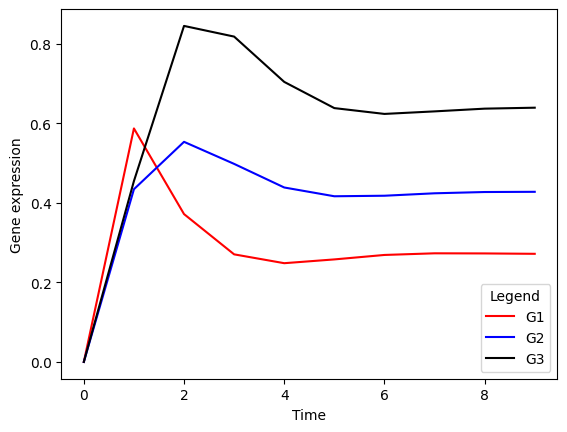

In [28]:
def gene_reg(t, x, k1, k2, k3, K13, K21, K31, K32, d1, d2, d3):
    g1 = x[0]
    g2 = x[1]
    g3 = x[2]
    dg1dt = k1 / (1 + K13 * g3) - d1 * g1
    dg2dt = k2 * K21 * g1 / (1 + K21 * g1) - d2 * g2
    dg3dt = k3 * (K31 * g1 * K32 * g2) / ((1 + K31 * g1) * (1 + K32 * g2)) - d3 * g3
    return [dg1dt, dg2dt, dg3dt]

k1 = k2 = 2                 # Transcriptional activation rate of genes G1 and G2 
k3 = 10                     # Transcriptional activation rate of gene G3
K13 = 10                    # Interaction coefficient of G1 inhibition by G3
K21 = K31 = K32 = 1         # Interaction coefficient of G2 and G3 activation by G1 and G2
d1 = d2 = d3 = 1            # Transcriptional repression rates of genes G1, G2 and G3
Tmax = 10                   # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution

x = [0, 0, 0]               # Initial amounts of genes G1, G2 and G3
pop = solve_ivp(gene_reg, t_span, x, args = [k1, k2, k3, K13, K21, K31, K32, d1, d2, d3], t_eval = t)

plt.plot(pop.t, pop.y[0], 'r', label = 'G1')
plt.plot(pop.t, pop.y[1], 'b', label = 'G2')
plt.plot(pop.t, pop.y[2], 'k', label = 'G3')

# Units for both axes are arbitrary
plt.xlabel('Time')
plt.ylabel('Gene expression')
plt.legend(loc = 'lower right', title = 'Legend')

plt.savefig("../output/000.tiff")

From this output, we can observe several key things:
- As expected, as the G1 expression increases, so does the expression of G2 and G3.
- As the G3 expression rapidly increases, the gene expression of G1 reaches its peak and starts to decrease at a rapid rate, which can be explained by the K<sub>13</sub> regulatory coefficient (K<sub>13</sub> = 10) that is stronger than transcriptional activation regulatory mechanisms in this network (K<sub>21</sub> = K<sub>31</sub> = K<sub>32</sub> = 1).
- As the G1 expression reaches its peak and starts to decrease, G2 expression starts to increase at a slower rate, reaching it's peak and starting to decrease at a steady pace as its activity is dependent on G1 expression.
- G3 reaches a much higher expression level compared to genes G1 and G2, explained by its higher transcriptional activation rate (k<sub>3</sub> = 10, compared to k<sub>1</sub> = k<sub>2</sub> = 2). 
- All three genes reach a steady state within the first 10 units of time. 

As the gene expression levels of all three genes peak and start to decrease before reaching the arbitrary unit of 1, next we will change the initial conditions to
$
[G1](0) = [G2](0) = [G3](0) = 1,
$ to see the impact this will have on the results.

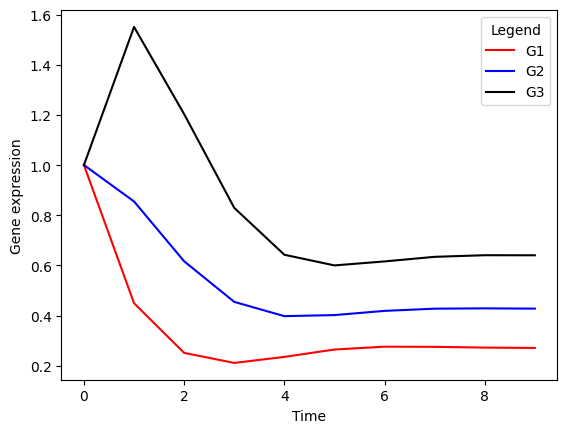

In [29]:
x = [1, 1, 1]
pop = solve_ivp(gene_reg, t_span, x, args = [k1, k2, k3, K13, K21, K31, K32, d1, d2, d3], t_eval = t)

plt.plot(pop.t, pop.y[0], 'r', label = 'G1')
plt.plot(pop.t, pop.y[1], 'b', label = 'G2')
plt.plot(pop.t, pop.y[2], 'k', label = 'G3')

plt.xlabel('Time')
plt.ylabel('Gene expression')
plt.legend(loc = 'upper right', title = 'Legend')

plt.savefig("../output/111.png")

In this output, we can notice that from time 0 to time 1, G1 and G2 expressions decline at a rapid rate, while G3 expression increases at a rapid rate. This is because i) G3 has a higher transcriptional activation rate (k<sub>3</sub> = 10) than G1 and G2, and ii) the already high presence of G1 and G2 further drives the transcriptional activation of G3, which inhibits G1, repressing its transcription. G2 is activated by G1, therefore, as G1 expression levels decrease, G2 expression levels follow. As in the previous output, we can see that G1 repression rate is steeper than G2 repression rate, which is due to the high K<sub>13</sub> regulatory coefficient. Moreover, the steady-state dynamic did not change despite different initial conditions. 

Finally, we are going to find the steady states of the model.


In [26]:
# To calculate the steady state, the differential equation of the function has to equal zero, from which x, representing a steady state, can be calculated. 
def steady_state(x, k1, k2, k3, K13, K21, K31, K32, d1, d2, d3):
    g1 = x[0]
    g2 = x[1]
    g3 = x[2]
    eq1 = k1 / (1 + K13 * g3) - d1 * g1
    eq2 = k2 * K21 * g1 / (1 + K21 * g1) - d2 * g2
    eq3 = k3 * (K31 * g1 * K32 * g2) / ((1 + K31 * g1) * (1 + K32 * g2)) - d3 * g3
    return [eq1, eq2, eq3]

k1 = k2 = 2                 # Transcriptional activation rate of genes g1 and g2 
k3 = 10                     # Transcriptional activation rate of gene g3
K13 = 10                    # Interaction coefficient of G1 inhibition by G3
K21 = K31 = K32 = 1         # Interaction coefficient of G2 and G3 activation by G1 and G2
d1 = d2 = d3 = 1            # Transcriptional repression rates of genes g1, g2 and g3

x0 = [1, 1, 1]

steady_states = fsolve(steady_state, x0, args = (k1, k2, k3, K13, K21, K31, K32, d1, d2, d3))

g1s = steady_states[0]
g2s = steady_states[1]
g3s = steady_states[2]

print(f'G1 reaches its steady state at the gene expression level of {g1s}.')
print(f'G2 reaches its steady state at the gene expression level of {g2s}.')
print(f'G3 reaches its steady state at the gene expression level of {g3s}.')

G1 reaches its steady state at the gene expression level of 0.27110017667389524.
G2 reaches its steady state at the gene expression level of 0.4265598914167873.
G3 reaches its steady state at the gene expression level of 0.6377346722976718.


C:\Users\doram\AppData\Local\Temp\ipykernel_12228\753338480.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right', title = 'Legend')


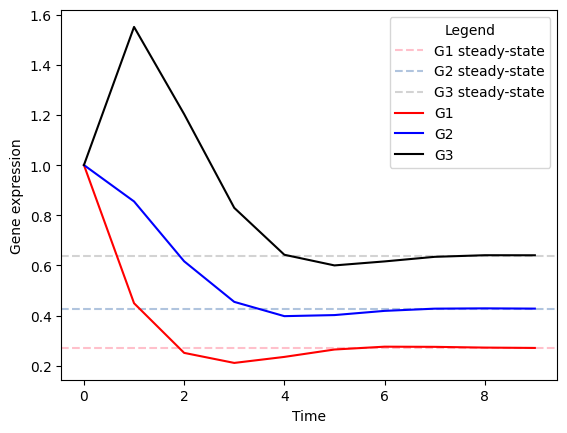

In [27]:
# Visualise the steady states
x = [1, 1, 1]
pop = solve_ivp(gene_reg, t_span, x, args = [k1, k2, k3, K13, K21, K31, K32, d1, d2, d3], t_eval = t)

plt.xlabel('Time')
plt.ylabel('Gene expression')
plt.legend(loc = 'upper right', title = 'Legend')

# Add steady-state labels to the plot
plt.axhline(y = g1s, color = 'pink', linestyle = 'dashed', label = 'G1 steady-state')
plt.axhline(y = g2s, color = 'lightsteelblue', linestyle = 'dashed', label = 'G2 steady-state')
plt.axhline(y = g3s, color = 'lightgray', linestyle = 'dashed', label = 'G3 steady-state')

plt.plot(pop.t, pop.y[0], 'r', label = 'G1')
plt.plot(pop.t, pop.y[1], 'b', label = 'G2')
plt.plot(pop.t, pop.y[2], 'k', label = 'G3')

plt.xlabel('Time')
plt.ylabel('Gene expression')
plt.legend(loc = 'upper right', title = 'Legend')

plt.savefig("../output/steady-states.png")